### IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\remel\OneDrive\Documents\81 column dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### SANITARY CHECK

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1.NULL VALUES

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### 2. duplicates

In [10]:
df.duplicated().sum()

0

### 3.GARBAGE VALUES

In [12]:
for i in df.select_dtypes(include=['object']).columns:
  print(df[i].value_counts())
  print("-"*50)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
--------------------------------------------------
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
--------------------------------------------------
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
--------------------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
--------------------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
--------------------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
--------------------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
--------------------------------------------------
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: in

### EDA

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.describe(include="object").T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


### CHECKING DISTRIBUTIONS

### CHECKING OUTLIERS

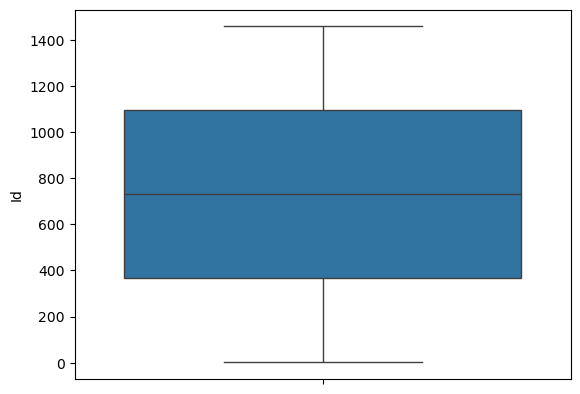

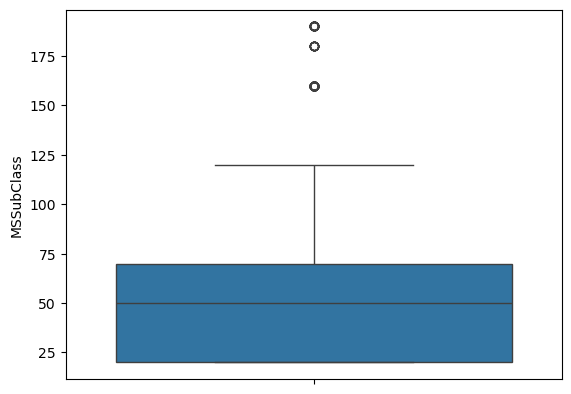

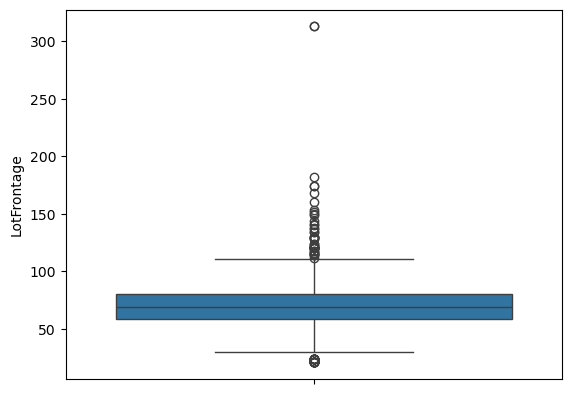

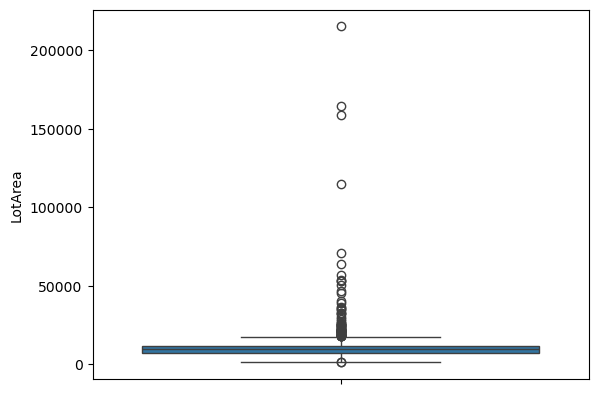

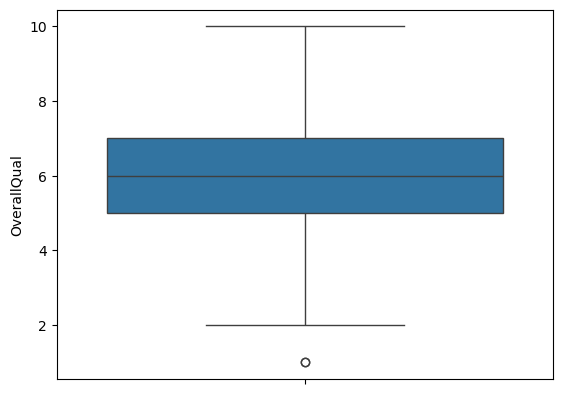

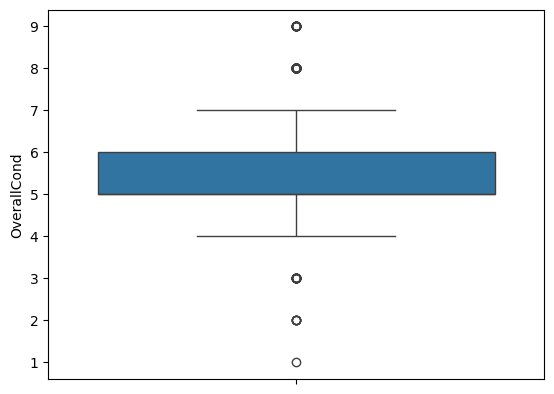

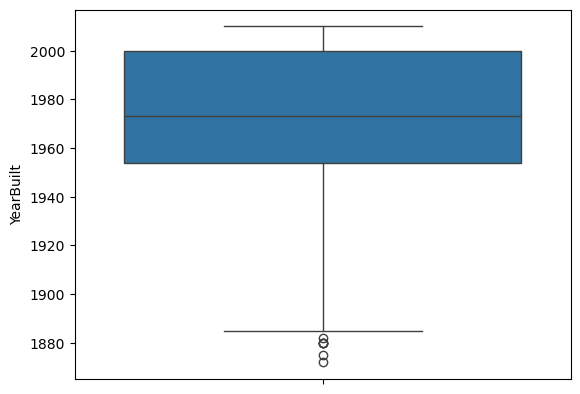

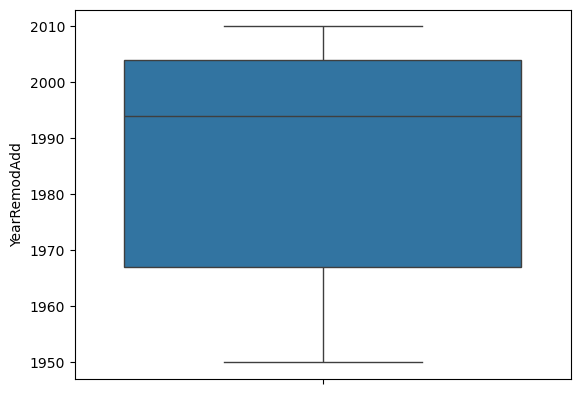

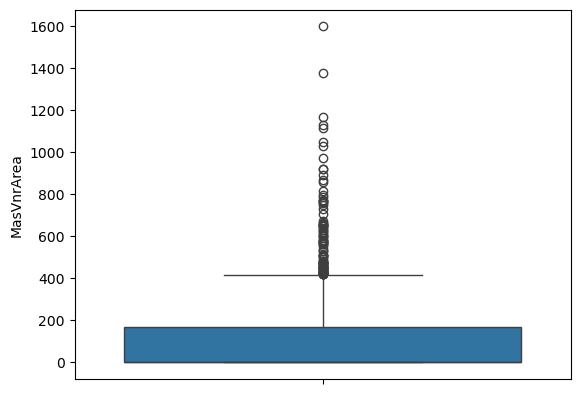

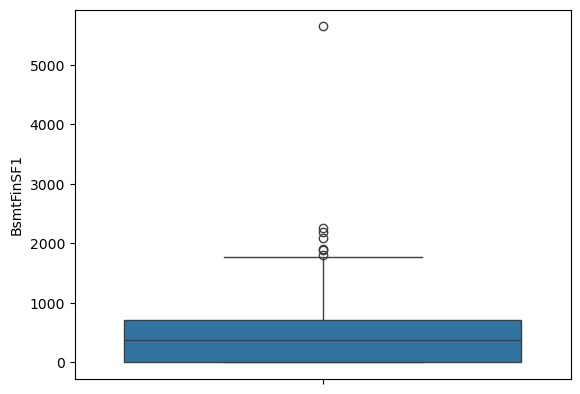

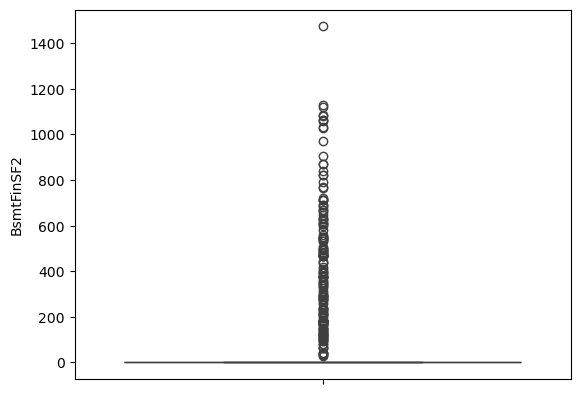

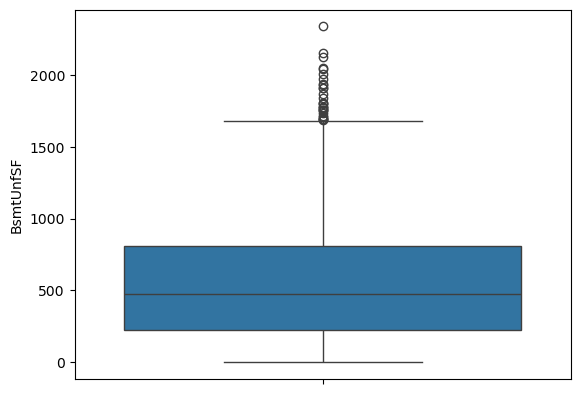

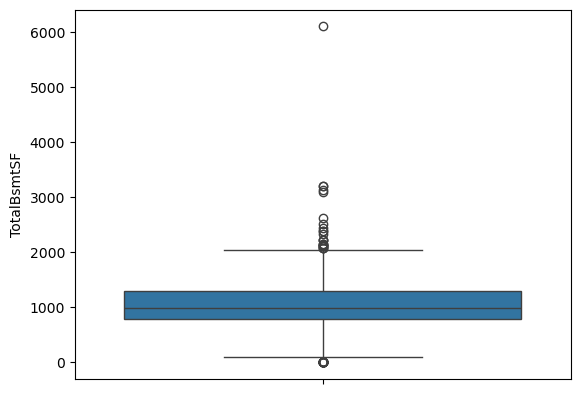

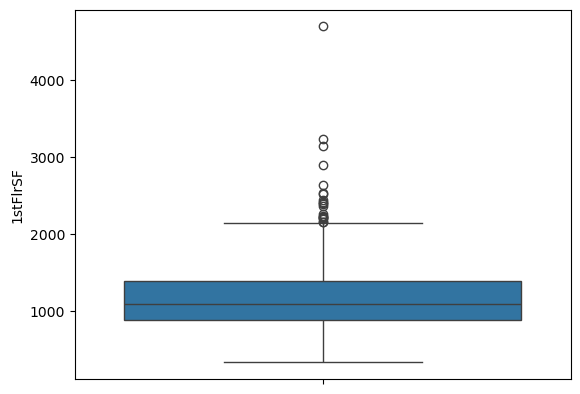

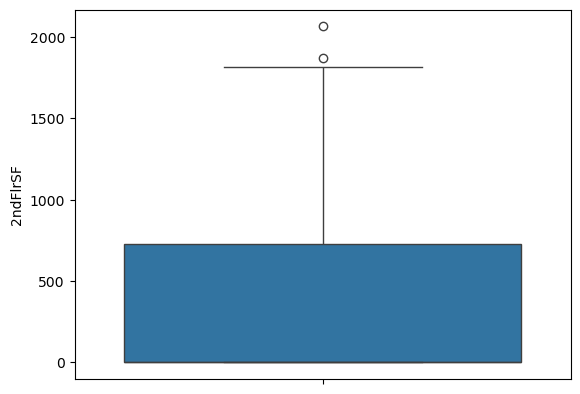

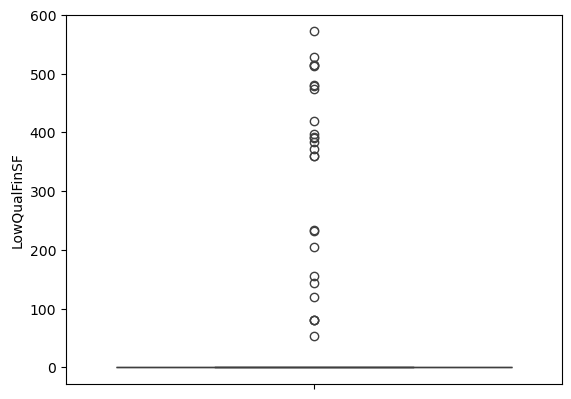

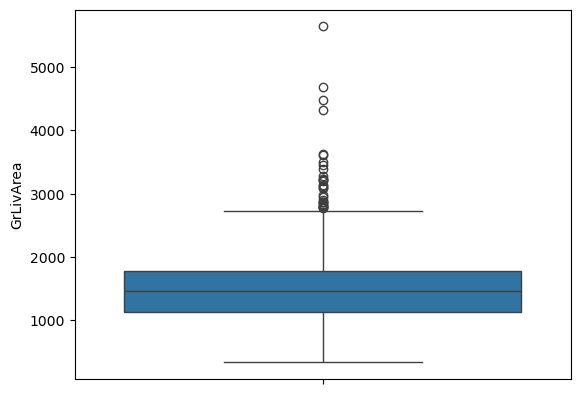

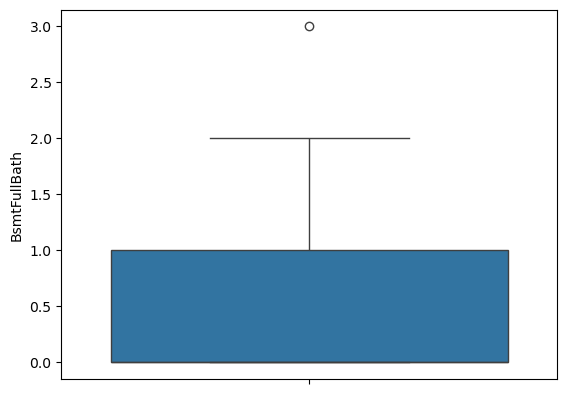

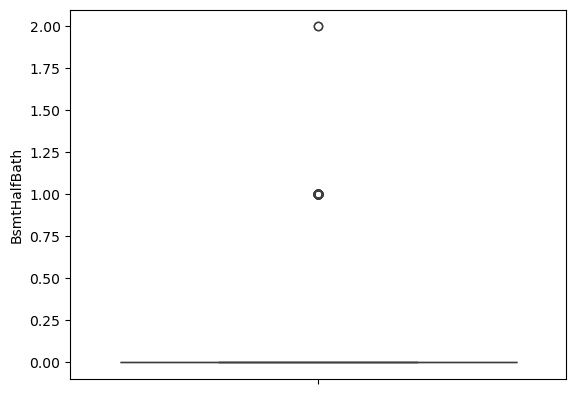

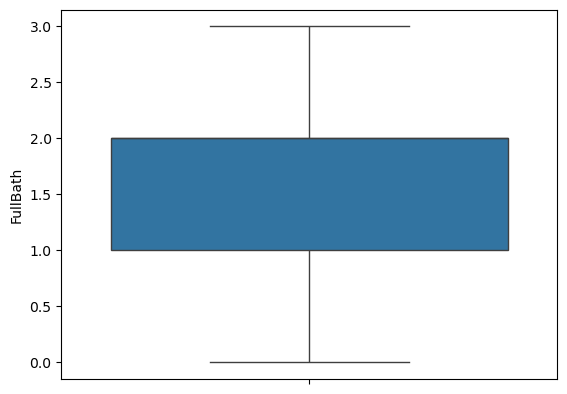

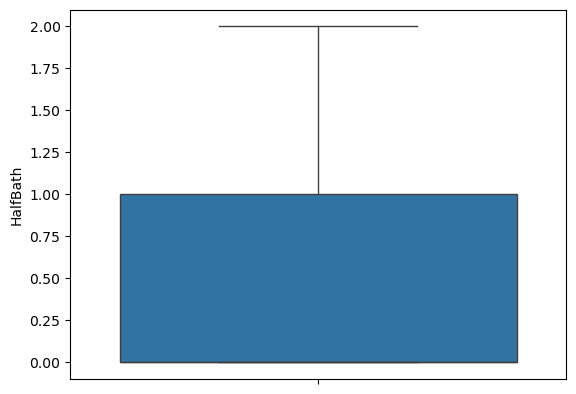

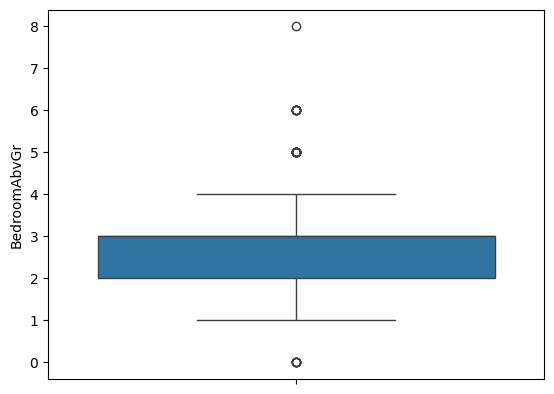

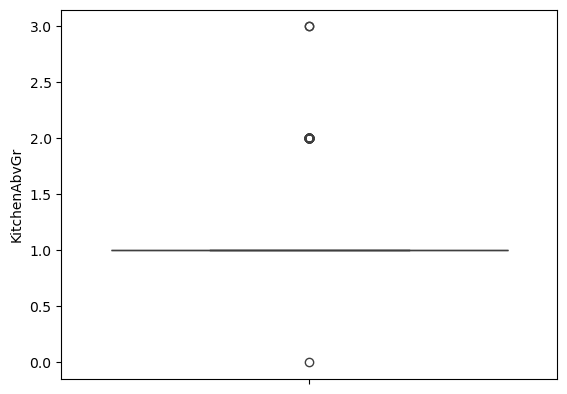

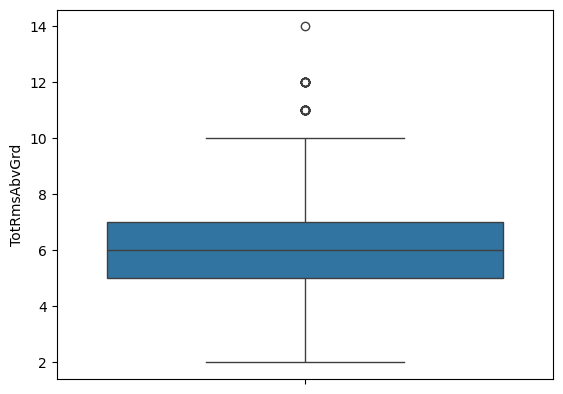

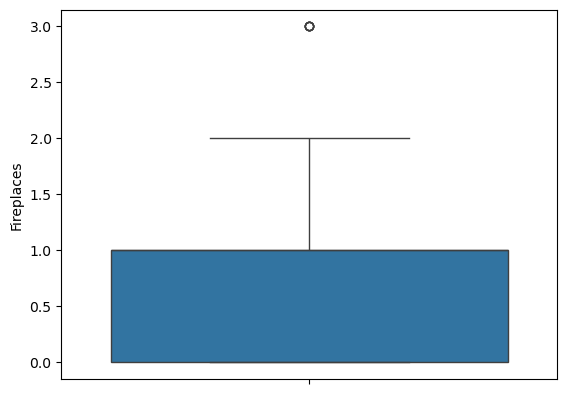

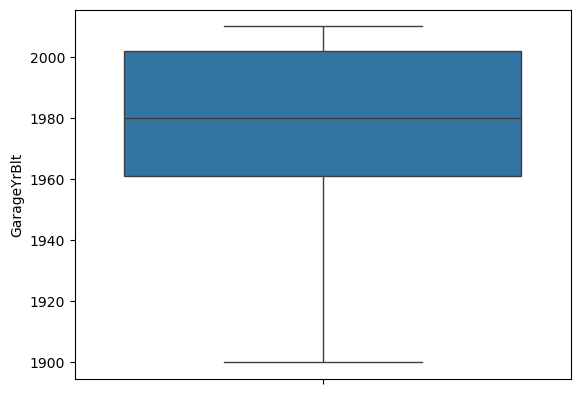

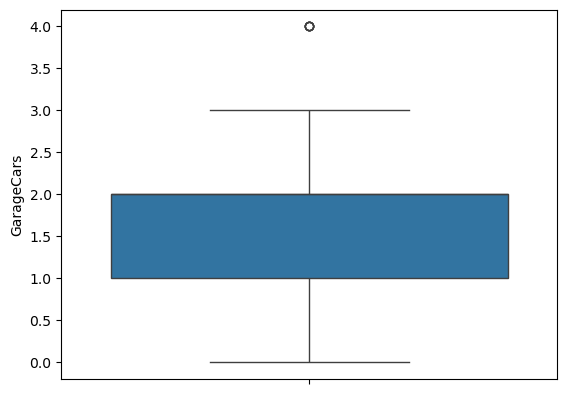

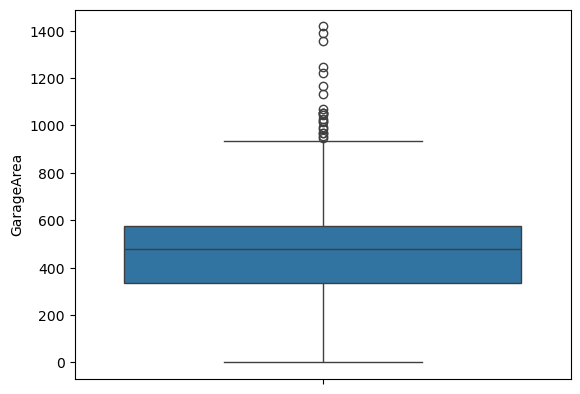

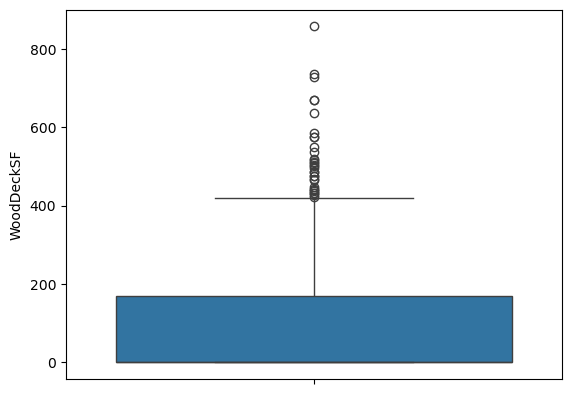

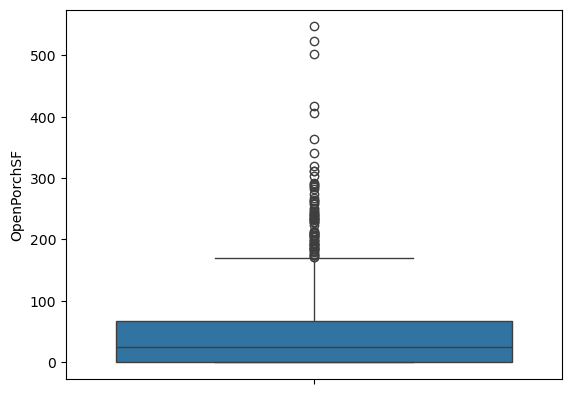

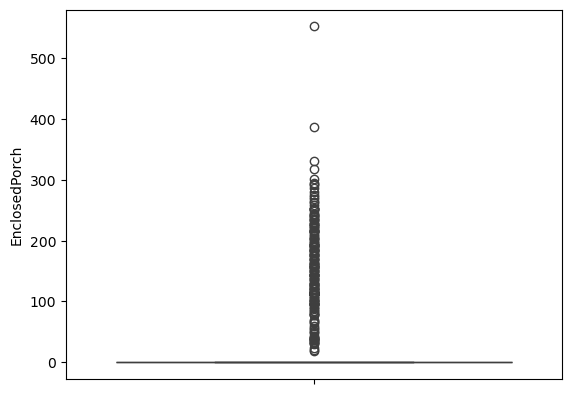

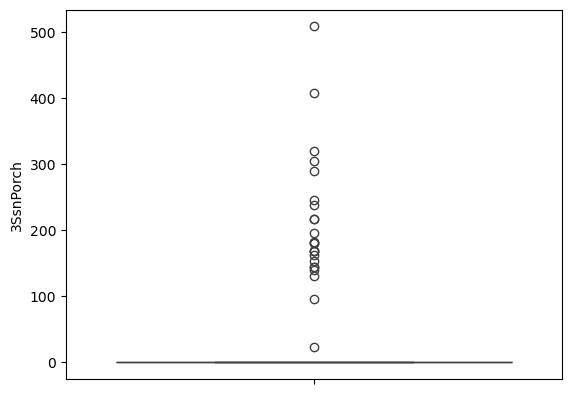

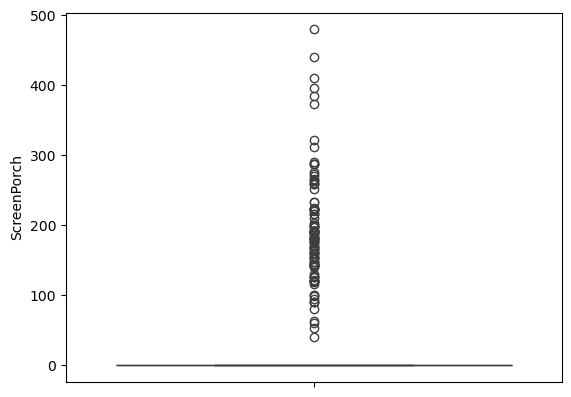

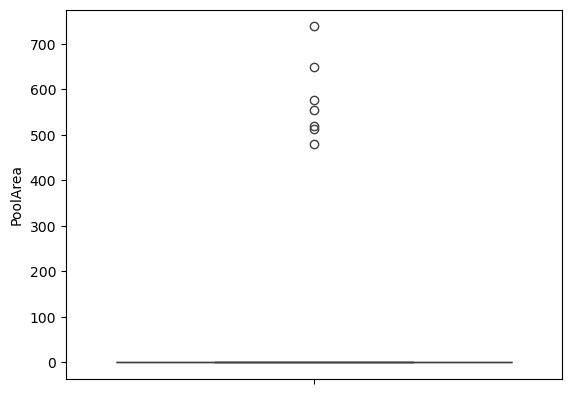

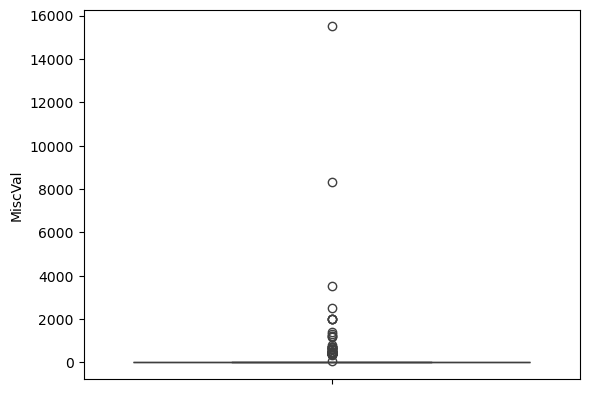

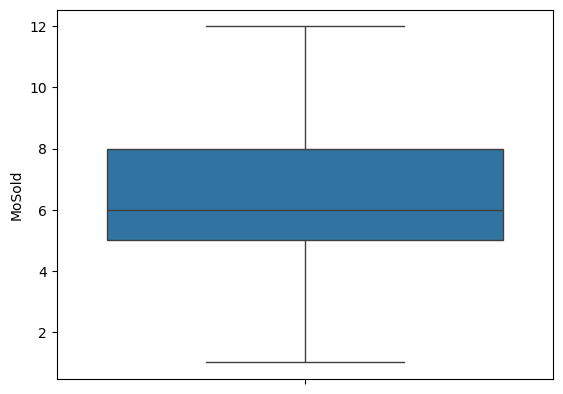

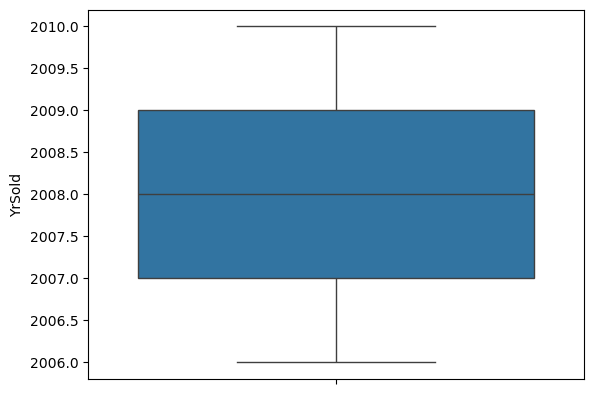

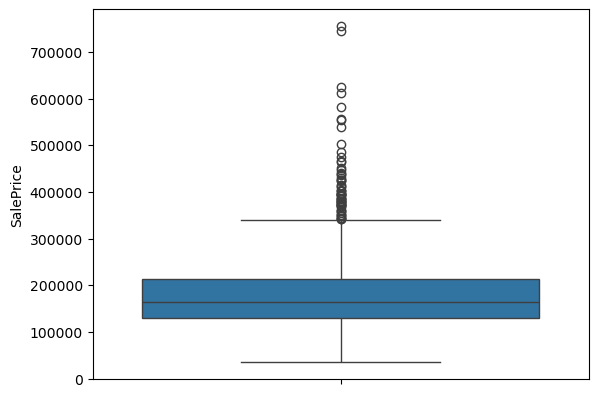

In [18]:
for i in df.select_dtypes(include=['number']).columns:
  sns.boxplot(df[i])
  plt.show()

In [19]:
def wisker(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [20]:
for i in df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])

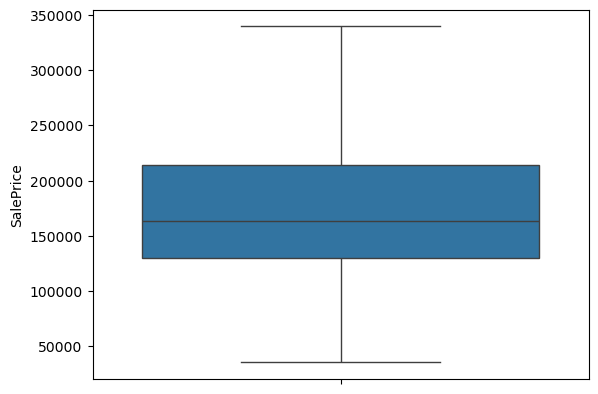

In [21]:
sns.boxplot(df[i])
plt.show()

### ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le=LabelEncoder()

In [24]:
for i in df.select_dtypes(include=['object']).columns:
  df[i]=le.fit_transform(df[i])

### SCALING

In [26]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,0.32,3,0.446429,0.430367,1,2,3,3,0,...,0.0,3,4,4,0.0,0.090909,0.50,8,4,0.568924
1,0.000685,0.00,3,0.625000,0.501390,1,2,3,3,0,...,0.0,3,4,4,0.0,0.363636,0.25,8,4,0.480439
2,0.001371,0.32,3,0.482143,0.603292,1,2,0,3,0,...,0.0,3,4,4,0.0,0.727273,0.50,8,4,0.618082
3,0.002056,0.40,3,0.386905,0.498302,1,2,0,3,0,...,0.0,3,4,4,0.0,0.090909,0.00,8,0,0.344435
4,0.002742,0.32,3,0.672619,0.789186,1,2,0,3,0,...,0.0,3,4,4,0.0,1.000000,0.50,8,4,0.704928


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [29]:
mean=df["LotFrontage"].mean()
df["LotFrontage"]=df["LotFrontage"].fillna(mean)

In [30]:
df["MasVnrArea"]=df["MasVnrArea"].fillna(mean)

In [31]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(mean)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   float64
 18  OverallC

In [33]:
x=df.drop("SalePrice",axis=1)
y=df["SalePrice"]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print("mean_squared_error : ",mean_squared_error(y_test,y_pred))
print("r2_score : ",r2_score(y_test,y_pred)*100)

mean_squared_error :  0.004648815870471739
r2_score :  91.14698355733468


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=21)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print("mean_squared_error : ",mean_squared_error(y_test,y_pred))
print("r2_score : ",r2_score(y_test,y_pred)*100)

mean_squared_error :  0.004257516393192513
r2_score :  91.89215841538038


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
x_train_pca= pca.fit_transform(x_train)
x_test_pca= pca.transform(x_test)

In [39]:
lr.fit(x_train_pca,y_train)
y_pred=lr.predict(x_test_pca)

In [40]:
!pip install mlflow

In [44]:
mlflow.set_experiment("housing-prediction")

NameError: name 'mlflow' is not defined